In [1]:
# Install R essentials
system("apt-get install --allow-releaseinfo-change -y r-base r-base-dev")
system("apt-get install --allow-releaseinfo-change -y libcurl4-openssl-dev libssl-dev libxml2-dev")

In [2]:
# Minimal setup with essential packages
if (!require(pacman)) install.packages("pacman")
pacman::p_load(tidyverse, haven, mice, car, nnet, lmtest)

Loading required package: pacman

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘pacman’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘Rdpack’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘ucminf’, ‘numDeriv’, ‘iterators’, ‘lme4’, ‘ordinal’, ‘foreach’, ‘shape’, ‘RcppEigen’, ‘pan’, ‘jomo’, ‘glmnet’, ‘mitml’



mice installed

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘cowplot’, ‘Deriv’, ‘microbenchmark’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘carData’, ‘abind’, ‘Formula’, ‘pbkrtest’, ‘quantreg’



car installed

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zoo’



lmtest installed



In [3]:
# Install visualization-related packages
viz_packages <- c(
  'VIM',
  'visdat',
  'corrplot',
  'gridExtra'
)

# Install visualization packages
for(pkg in viz_packages) {
  if(!require(pkg, character.only = TRUE)) {
    install.packages(pkg)
    library(pkg, character.only = TRUE)
  }
}

Loading required package: VIM

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘VIM’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘DEoptimR’, ‘proxy’, ‘robustbase’, ‘sp’, ‘vcd’, ‘e1071’, ‘laeken’, ‘ranger’


Loading required package: colorspace

Loading required package: grid

VIM is ready to use.


Suggestions and bug-reports can be submitted at: https://github.com/statistikat/VIM/issues


Attaching package: ‘VIM’


The following object is masked from ‘package:datasets’:

    sleep


Loading required package: visdat

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘visdat’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: corrplot

Warning message in library(package, lib.loc = lib.loc, charac

In [4]:
# Install statistical analysis packages
stat_packages <- c(
  'effectsize',
  'DescTools',
  'sandwich'
)

# Install statistical packages
for(pkg in stat_packages) {
  if(!require(pkg, character.only = TRUE)) {
    install.packages(pkg)
    library(pkg, character.only = TRUE)
  }
}

Loading required package: effectsize

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘effectsize’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bayestestR’, ‘insight’, ‘parameters’, ‘performance’, ‘datawizard’


Loading required package: DescTools

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘DescTools’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rootSolve’, ‘lmom’, ‘mvtnorm’, ‘expm’, ‘Exact’, ‘gld’



Attaching package: ‘DescTools’


The following object is masked from ‘package:car’:

    Recode


Loading required package: sandwich

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘sandwich’”


In [17]:
# Load all required libraries
library(tidyverse)
library(haven)
library(ggplot2)
library(mice)
library(VIM)
library(forcats)
library(visdat)
library(car)
library(nnet)
library(lmtest)
library(sandwich)
library(gridExtra)
library(vcd)
library(effectsize)
library(corrplot)
library(DescTools)

In [19]:
# Load the SPSS data file
# Update this path to match where you uploaded the file in your Google Drive
qlfs_2015 <- read_sav("/content/lfsp_jm15_teaching_final2.sav")

# Remove CASENEW variable
qlfs_2015 <- qlfs_2015 %>%
  select(-CASENEW)

# Show initial data info
print("Dataset dimensions:")
print(dim(qlfs_2015))

print("Variable names:")
print(names(qlfs_2015))

[1] "Dataset dimensions:"
[1] 22428    13
[1] "Variable names:"
 [1] "PWT14"    "SEX"      "AGEEULR"  "MARSTA3R" "HIQUL15D" "ETHUK7R" 
 [7] "ILODEFR"  "STAT3R"   "FTPTWK"   "TOTHRS"   "NSECMJ3R" "GOVTOF2" 
[13] "PWT14R"  


Loading required package: naniar

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘naniar’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘norm’, ‘viridis’, ‘UpSetR’




[1] "Missing Value Analysis:"
         Variable Missing_Count Missing_Percentage
PWT14       PWT14             0               0.00
SEX           SEX             0               0.00
AGEEULR   AGEEULR             0               0.00
MARSTA3R MARSTA3R             0               0.00
HIQUL15D HIQUL15D          2423              10.80
ETHUK7R   ETHUK7R            17               0.08
ILODEFR   ILODEFR             0               0.00
STAT3R     STAT3R          5144              22.94
FTPTWK     FTPTWK          5165              23.03
TOTHRS     TOTHRS          8957              39.94
NSECMJ3R NSECMJ3R             0               0.00
GOVTOF2   GOVTOF2             0               0.00
PWT14R     PWT14R             0               0.00


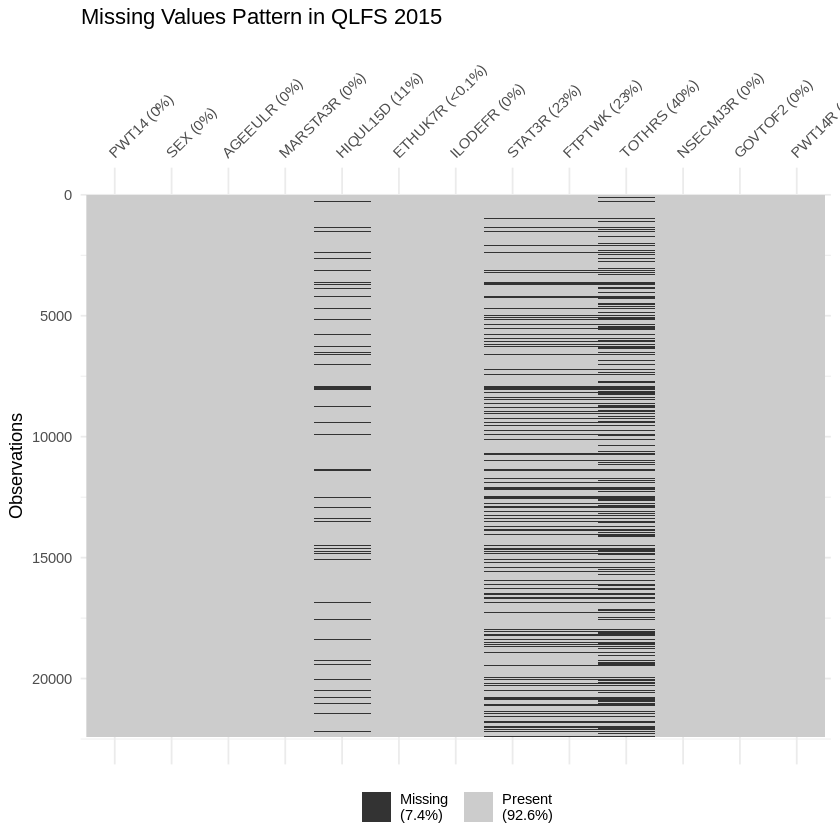

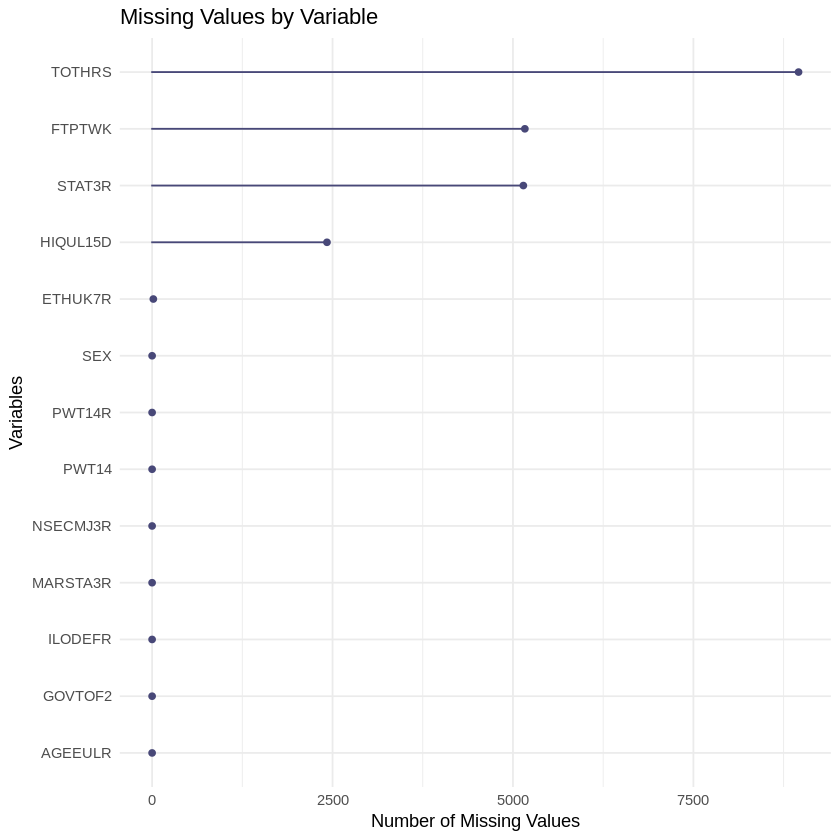

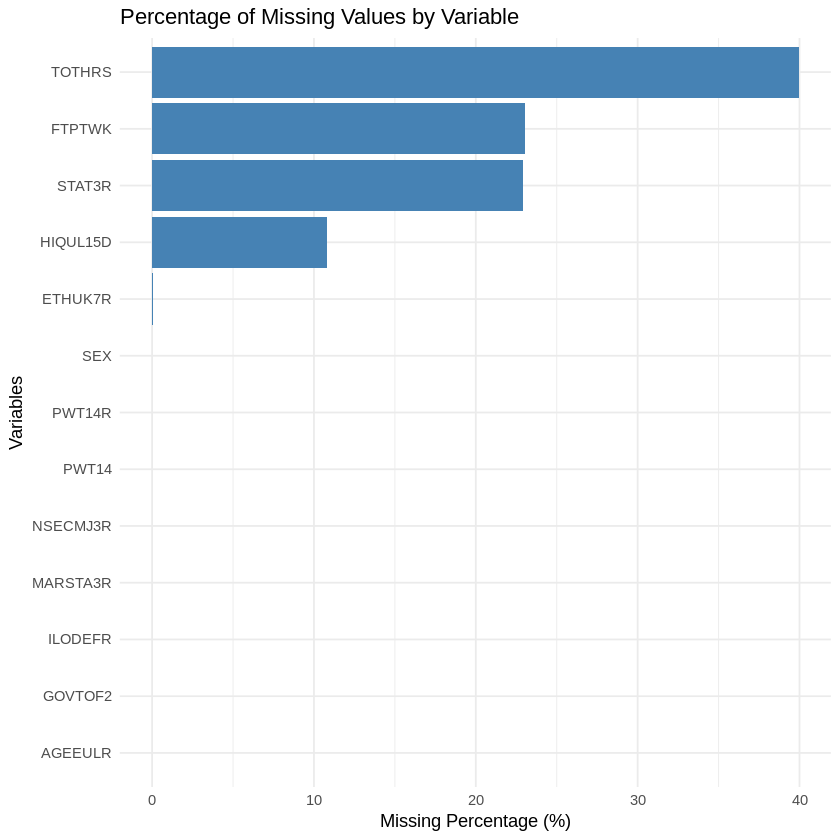

In [21]:
# Install and load required packages for missing value analysis
if (!require(naniar)) install.packages("naniar")
if (!require(visdat)) install.packages("visdat")
if (!require(ggplot2)) install.packages("ggplot2")
library(naniar)
library(visdat)
library(ggplot2)

# Missing values analysis
missing_summary <- data.frame(
  Variable = names(qlfs_2015),
  Missing_Count = colSums(is.na(qlfs_2015)),
  Missing_Percentage = round(colSums(is.na(qlfs_2015)) / nrow(qlfs_2015) * 100, 2)
)

# Display missing values summary
print("Missing Value Analysis:")
print(missing_summary)

# Create visualizations of missing values
# Plot 1: Missing values pattern using vis_miss
vis_miss(qlfs_2015) +
  ggtitle("Missing Values Pattern in QLFS 2015")

# Plot 2: Alternative missing values visualization using gg_miss_var
gg_miss_var(qlfs_2015) +
  theme_minimal() +
  labs(title = "Missing Values by Variable",
       x = "Variables",
       y = "Number of Missing Values")

# Plot 3: Missing values by variable (using basic ggplot)
ggplot(missing_summary, aes(x = reorder(Variable, Missing_Percentage), y = Missing_Percentage)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  coord_flip() +
  theme_minimal() +
  labs(title = "Percentage of Missing Values by Variable",
       x = "Variables",
       y = "Missing Percentage (%)")

In [22]:
# Define variable types
numeric_vars <- c("PWT14", "TOTHRS", "PWT14R")
categorical_vars <- c("SEX", "MARSTA3R", "HIQUL15D", "ETHUK7R", "ILODEFR",
                     "STAT3R", "FTPTWK", "NSECMJ3R", "GOVTOF2")
ordinal_vars <- c("AGEEULR")

# Function to get mode for categorical variables
get_mode <- function(x) {
  if (all(is.na(x))) return(NA)
  ux <- unique(x[!is.na(x)])
  ux[which.max(tabulate(match(x[!is.na(x)], ux)))]
}

# Clean and transform variables
qlfs_2015_clean <- qlfs_2015 %>%
  # Replace special missing values
  mutate(across(everything(), ~if_else(. %in% c(-8, -9), NA_real_, as.numeric(.)))) %>%
  # Convert variables to appropriate types with labels
  mutate(
    # Weights
    PWT14 = as.numeric(PWT14),
    PWT14R = as.numeric(PWT14R),

    # Demographic variables
    SEX = factor(SEX, levels = c(1, 2),
                labels = c("Male", "Female")),

    MARSTA3R = factor(MARSTA3R, levels = 1:3,
                     labels = c("Single, never married",
                              "Married/Cohabiting/Civil Partner",
                              "Divorced/Widowed/Previously in Civil Partnership")),

    AGEEULR = factor(AGEEULR, levels = 1:12,
                     labels = c("15-19", "20-24", "25-29", "30-34", "35-39",
                              "40-44", "45-49", "50-54", "55-59", "60-64",
                              "65-69", "70 and over")),

    # Education and ethnicity
    HIQUL15D = factor(HIQUL15D, levels = 1:7,
                      labels = c("Degree or equivalent", "Higher education",
                               "GCE, A-level or equivalent", "GCSE grades A*-C or equivalent",
                               "Other qualifications", "No qualification", "Don't know")),

    ETHUK7R = factor(ETHUK7R, levels = 1:7,
                     labels = c("White", "Mixed/Multiple ethnic groups", "Indian",
                              "Pakistani or Bangladeshi",
                              "Chinese or any other Asian background",
                              "Black/African/Caribbean/Black British",
                              "Other ethnic group")),

    # Employment variables
    ILODEFR = factor(ILODEFR, levels = 1:4,
                     labels = c("In employment", "ILO unemployed",
                              "Inactive", "Under 16")),

    STAT3R = factor(STAT3R, levels = 1:3,
                    labels = c("Employee", "Self-employed",
                             "Government scheme or unpaid family worker")),

    FTPTWK = factor(FTPTWK, levels = 1:2,
                    labels = c("Full-time", "Part-time")),

    TOTHRS = as.numeric(if_else(TOTHRS == 97, NA_real_, as.numeric(TOTHRS))), # Handle 97+ hours special case

    NSECMJ3R = factor(NSECMJ3R, levels = 1:4,
                      labels = c("Higher managerial, administrative and professional occupations",
                               "Intermediate occupations and small employers",
                               "Routine and manual occupations",
                               "Never worked, unemployed, and nec")),

    # Geographic variable
    GOVTOF2 = factor(GOVTOF2, levels = 1:13,
                     labels = c("North East", "North West (inc Merseyside)",
                              "Yorkshire and Humberside", "East Midlands",
                              "West Midlands", "Eastern", "London",
                              "South East", "South West", "Wales",
                              "Scotland", "Northern Ireland", "Does not apply"))
  )

# Display sample of cleaned data
head(qlfs_2015_clean)

PWT14,SEX,AGEEULR,MARSTA3R,HIQUL15D,ETHUK7R,ILODEFR,STAT3R,FTPTWK,TOTHRS,NSECMJ3R,GOVTOF2,PWT14R
<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<dbl>
628,Male,45-49,Married/Cohabiting/Civil Partner,GCSE grades A*-C or equivalent,White,In employment,Employee,Full-time,0,"Higher managerial, administrative and professional occupations",South West,0.9139198
491,Female,45-49,"Single, never married",Degree or equivalent,White,Inactive,Employee,Full-time,NA,"Higher managerial, administrative and professional occupations",South West,0.7145456
641,Male,25-29,"Single, never married","GCE, A-level or equivalent",White,In employment,Employee,Full-time,40,Routine and manual occupations,Wales,0.9328385
696,Female,55-59,Married/Cohabiting/Civil Partner,No qualification,White,Inactive,NA,NA,NA,"Never worked, unemployed, and nec",West Midlands,1.0128793
584,Female,65-69,Divorced/Widowed/Previously in Civil Partnership,GCSE grades A*-C or equivalent,White,In employment,Employee,Full-time,0,Intermediate occupations and small employers,Scotland,0.8498872
469,Female,40-44,Married/Cohabiting/Civil Partner,Degree or equivalent,White,Inactive,Employee,Full-time,NA,"Higher managerial, administrative and professional occupations",South East,0.6825293


In [23]:
# Perform imputation
qlfs_2015_imputed <- qlfs_2015_clean %>%
  mutate(
    # Numeric variables: median imputation
    across(all_of(numeric_vars), ~if_else(is.na(.), median(., na.rm = TRUE), .)),

    # Categorical and ordinal variables: mode imputation
    across(all_of(c(categorical_vars, ordinal_vars)), function(x) {
      if_else(is.na(x),
              as.character(get_mode(x)),
              as.character(x)) %>%
        factor(levels = levels(x), labels = levels(x))
    })
  )

# Verify the imputation worked
print("Checking variable types after imputation:")
print(sapply(qlfs_2015_imputed, class))

# Check missing values after imputation
print("Missing values after imputation:")
print(colSums(is.na(qlfs_2015_imputed)))

[1] "Checking variable types after imputation:"
    PWT14       SEX   AGEEULR  MARSTA3R  HIQUL15D   ETHUK7R   ILODEFR    STAT3R 
"numeric"  "factor"  "factor"  "factor"  "factor"  "factor"  "factor"  "factor" 
   FTPTWK    TOTHRS  NSECMJ3R   GOVTOF2    PWT14R 
 "factor" "numeric"  "factor"  "factor" "numeric" 
[1] "Missing values after imputation:"
   PWT14      SEX  AGEEULR MARSTA3R HIQUL15D  ETHUK7R  ILODEFR   STAT3R 
       0        0        0        0        0        0        0        0 
  FTPTWK   TOTHRS NSECMJ3R  GOVTOF2   PWT14R 
       0        0        0        0        0 


In [25]:
if (!require(haven)) install.packages("haven")
library(tidyverse)
library(haven)

In [27]:
# Create frequency tables for categorical variables
cat_stats <- lapply(categorical_vars, function(var) { # Changed cat_vars to categorical_vars
  freq_table <- table(qlfs_2015_imputed[[var]])
  prop_table <- prop.table(freq_table) * 100
  data.frame(
    Variable = var,
    Category = names(freq_table),
    Frequency = as.vector(freq_table),
    Percentage = round(as.vector(prop_table), 2)
  )
})

# Display categorical statistics
cat_stats_df <- do.call(rbind, cat_stats)
print(cat_stats_df)

   Variable                                                       Category
1       SEX                                                           Male
2       SEX                                                         Female
3  MARSTA3R                                          Single, never married
4  MARSTA3R                               Married/Cohabiting/Civil Partner
5  MARSTA3R               Divorced/Widowed/Previously in Civil Partnership
6  HIQUL15D                                           Degree or equivalent
7  HIQUL15D                                               Higher education
8  HIQUL15D                                     GCE, A-level or equivalent
9  HIQUL15D                                 GCSE grades A*-C or equivalent
10 HIQUL15D                                           Other qualifications
11 HIQUL15D                                               No qualification
12 HIQUL15D                                                     Don't know
13  ETHUK7R              

In [28]:
# Calculate summary statistics for numerical variables
num_stats <- lapply(numeric_vars, function(var) {
  data.frame(
    Variable = var,
    Mean = mean(qlfs_2015_imputed[[var]], na.rm = TRUE),
    Median = median(qlfs_2015_imputed[[var]], na.rm = TRUE),
    SD = sd(qlfs_2015_imputed[[var]], na.rm = TRUE),
    Min = min(qlfs_2015_imputed[[var]], na.rm = TRUE),
    Max = max(qlfs_2015_imputed[[var]], na.rm = TRUE)
  )
})

# Display numerical statistics
num_stats_df <- do.call(rbind, num_stats)
print(num_stats_df)

  Variable       Mean      Median          SD Min        Max
1    PWT14 687.152666 622.0000000 403.0655576   0 7442.00000
2   TOTHRS  33.750178  37.0000000  13.7592561   0   96.00000
3   PWT14R   1.000004   0.9051881   0.5865758   0   10.83024


In [29]:
# Create cross-tabulations for key variables
key_cross_tabs <- list(
  "Employment Status by Region" = table(qlfs_2015_imputed$STAT3R, qlfs_2015_imputed$GOVTOF2),
  "Employment Status by Education" = table(qlfs_2015_imputed$STAT3R, qlfs_2015_imputed$HIQUL15D),
  "Employment Status by Socio-economic Class" = table(qlfs_2015_imputed$STAT3R, qlfs_2015_imputed$NSECMJ3R)
)

# Display cross-tabulations
for (name in names(key_cross_tabs)) {
  cat("\n", name, "\n")
  print(key_cross_tabs[[name]])
  cat("\n Chi-square test:\n")
  print(chisq.test(key_cross_tabs[[name]]))
  cat("\n")
}


 Employment Status by Region 
                                           
                                            North East
  Employee                                         904
  Self-employed                                     70
  Government scheme or unpaid family worker          2
                                           
                                            North West (inc Merseyside)
  Employee                                                         2230
  Self-employed                                                     243
  Government scheme or unpaid family worker                           5
                                           
                                            Yorkshire and Humberside
  Employee                                                         0
  Self-employed                                                    0
  Government scheme or unpaid family worker                        0
                                           
         

Warning message in chisq.test(key_cross_tabs[[name]]):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  key_cross_tabs[[name]]
X-squared = NaN, df = 24, p-value = NA



 Employment Status by Education 
                                           
                                            Degree or equivalent
  Employee                                                  6836
  Self-employed                                              781
  Government scheme or unpaid family worker                   30
                                           
                                            Higher education
  Employee                                              1660
  Self-employed                                          264
  Government scheme or unpaid family worker               13
                                           
                                            GCE, A-level or equivalent
  Employee                                                        3987
  Self-employed                                                    538
  Government sch

Warning message in chisq.test(key_cross_tabs[[name]]):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  key_cross_tabs[[name]]
X-squared = 48.709, df = 12, p-value = 2.352e-06



 Employment Status by Socio-economic Class 
                                           
                                            Higher managerial, administrative and professional occupations
  Employee                                                                                            6279
  Self-employed                                                                                        639
  Government scheme or unpaid family worker                                                              4
                                           
                                            Intermediate occupations and small employers
  Employee                                                                          2319
  Self-employed                                                                     1707
  Government scheme or unpaid family worker                  

In [30]:
# Calculate mean hours worked by various categories
hours_by_region <- aggregate(TOTHRS ~ GOVTOF2, data = qlfs_2015_imputed, FUN = mean)
hours_by_status <- aggregate(TOTHRS ~ STAT3R, data = qlfs_2015_imputed, FUN = mean)
hours_by_nsec <- aggregate(TOTHRS ~ NSECMJ3R, data = qlfs_2015_imputed, FUN = mean)

# Display mean hours analysis
print("Mean hours worked by region:")
print(hours_by_region)

print("Mean hours worked by employment status:")
print(hours_by_status)

print("Mean hours worked by socio-economic class:")
print(hours_by_nsec)

[1] "Mean hours worked by region:"
                       GOVTOF2   TOTHRS
1                   North East 32.92930
2  North West (inc Merseyside) 33.90759
3                East Midlands 33.37740
4                West Midlands 34.52648
5                      Eastern 34.13316
6                       London 33.58365
7                   South East 34.22162
8                   South West 33.27369
9                        Wales 33.18426
10                    Scotland 33.93867
11            Northern Ireland 33.52299
12              Does not apply 35.08691
[1] "Mean hours worked by employment status:"
                                     STAT3R   TOTHRS
1                                  Employee 34.00371
2                             Self-employed 32.20545
3 Government scheme or unpaid family worker 16.75309
[1] "Mean hours worked by socio-economic class:"
                                                        NSECMJ3R   TOTHRS
1 Higher managerial, administrative and professional occupations

[1] "Correlation matrix:"
            PWT14     TOTHRS     PWT14R
PWT14  1.00000000 0.03076817 1.00000000
TOTHRS 0.03076817 1.00000000 0.03076817
PWT14R 1.00000000 0.03076817 1.00000000


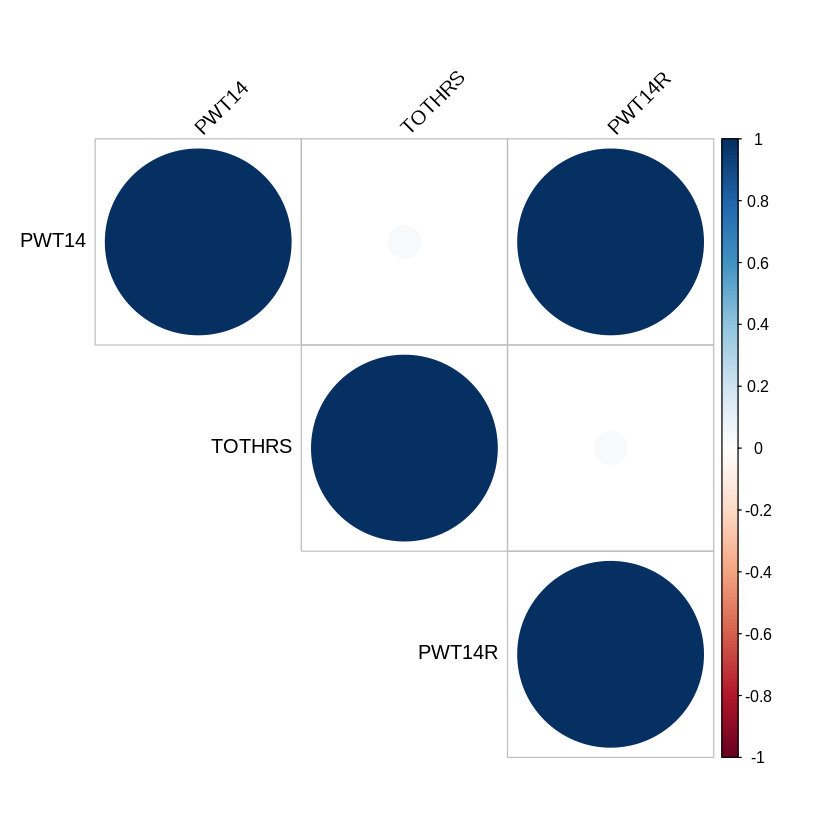

In [31]:
# Create correlation matrix for numeric variables
cor_matrix <- cor(qlfs_2015_imputed[, numeric_vars], use = "complete.obs")

# Display correlation matrix
print("Correlation matrix:")
print(cor_matrix)

# Visualize correlation matrix
corrplot(cor_matrix, method = "circle", type = "upper",
         tl.col = "black", tl.srt = 45)

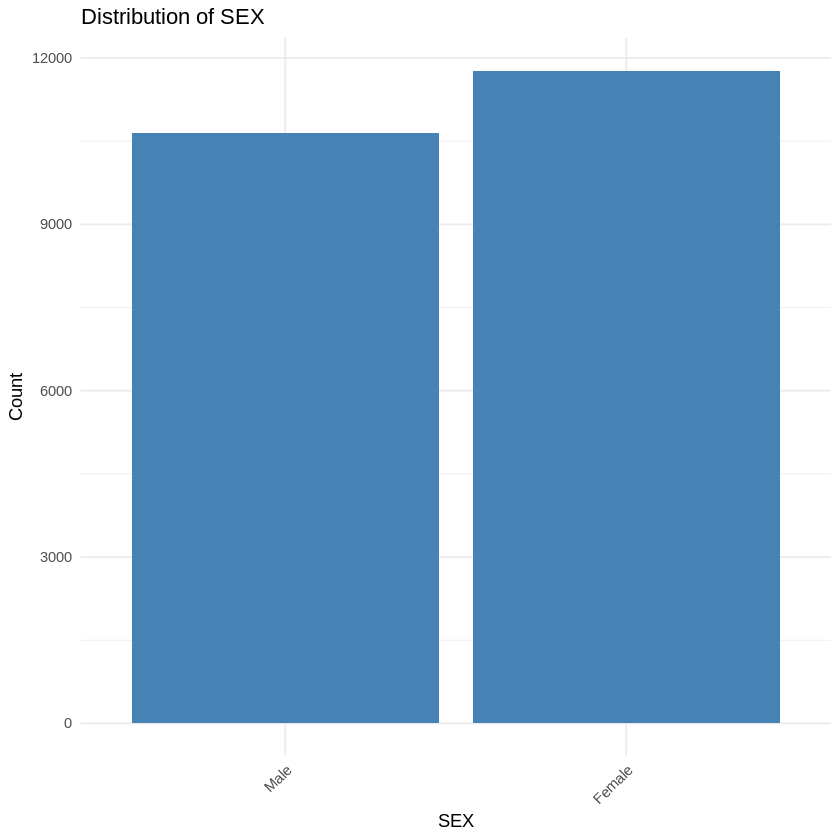

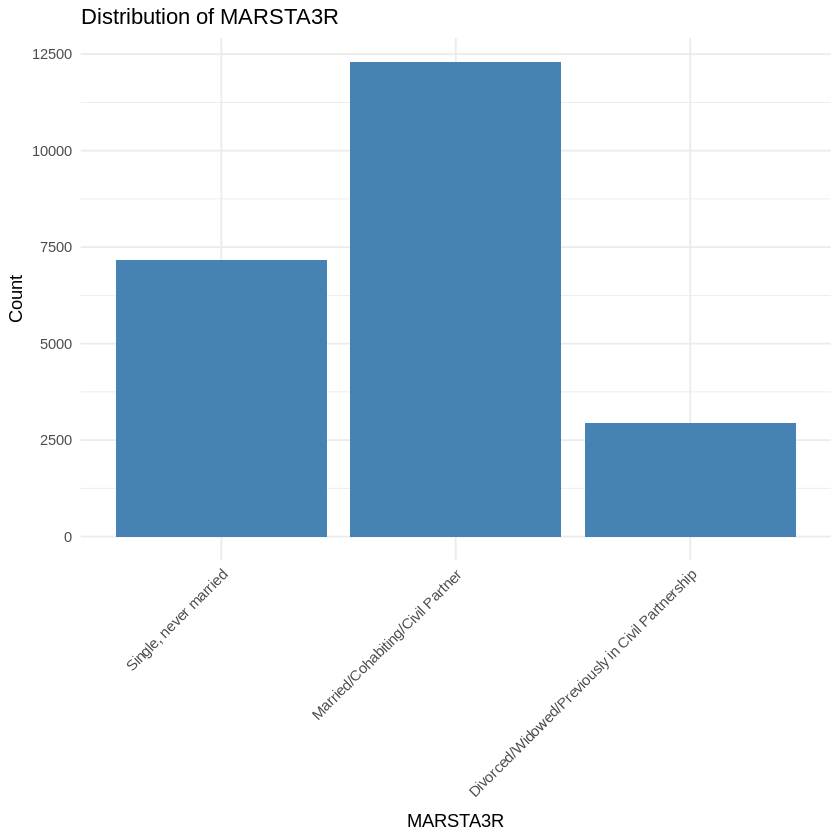

ERROR: Error: object 'num_vars' not found


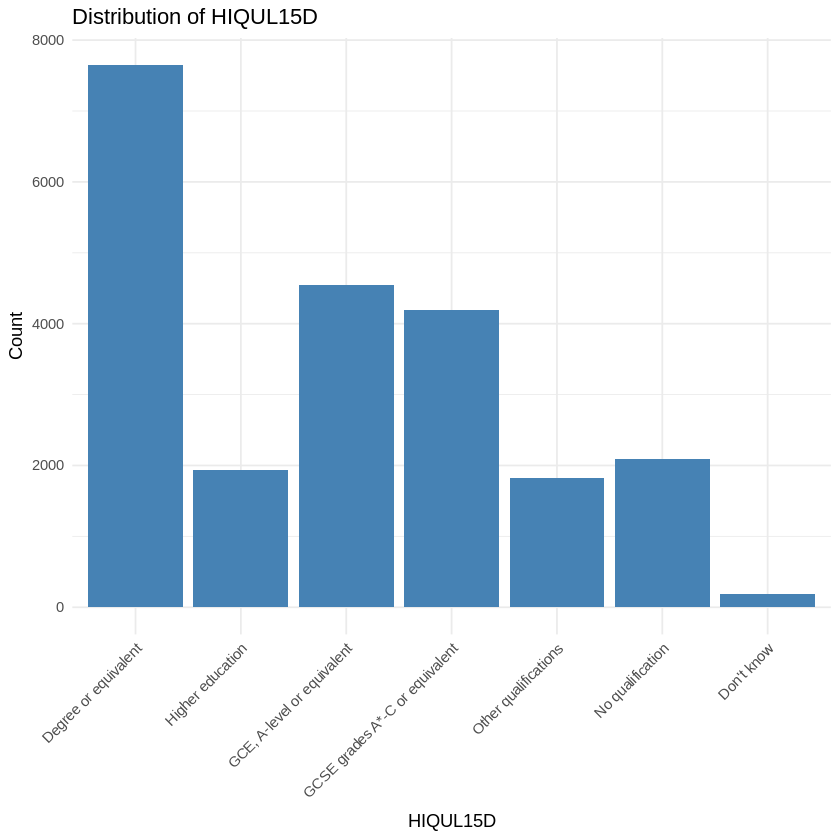

In [33]:
# Function for categorical variable plots
plot_categorical <- function(data, var_name) {
  ggplot(data, aes(x = .data[[var_name]])) +
    geom_bar(fill = "steelblue") +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    labs(title = paste("Distribution of", var_name),
         x = var_name,
         y = "Count")
}

# Function for numerical variable plots
plot_numerical <- function(data, var_name) {
  ggplot(data, aes(x = .data[[var_name]])) +
    geom_histogram(fill = "steelblue", bins = 30) +
    geom_density(color = "red") +
    theme_minimal() +
    labs(title = paste("Distribution of", var_name),
         x = var_name,
         y = "Count")
}

# Create plots for categorical variables (display first 3 for brevity)
# Changed cat_vars to categorical_vars
for (var in categorical_vars[1:3]) {
  print(plot_categorical(qlfs_2015_imputed, var))
}

# Create plots for numerical variables
for (var in num_vars) {
  print(plot_numerical(qlfs_2015_imputed, var))
}

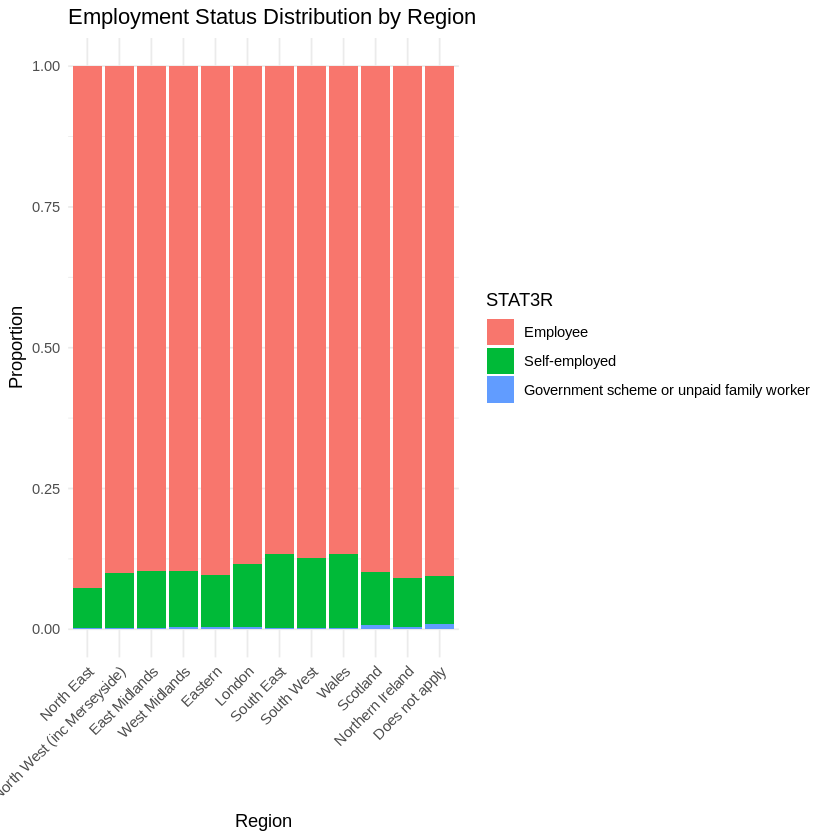

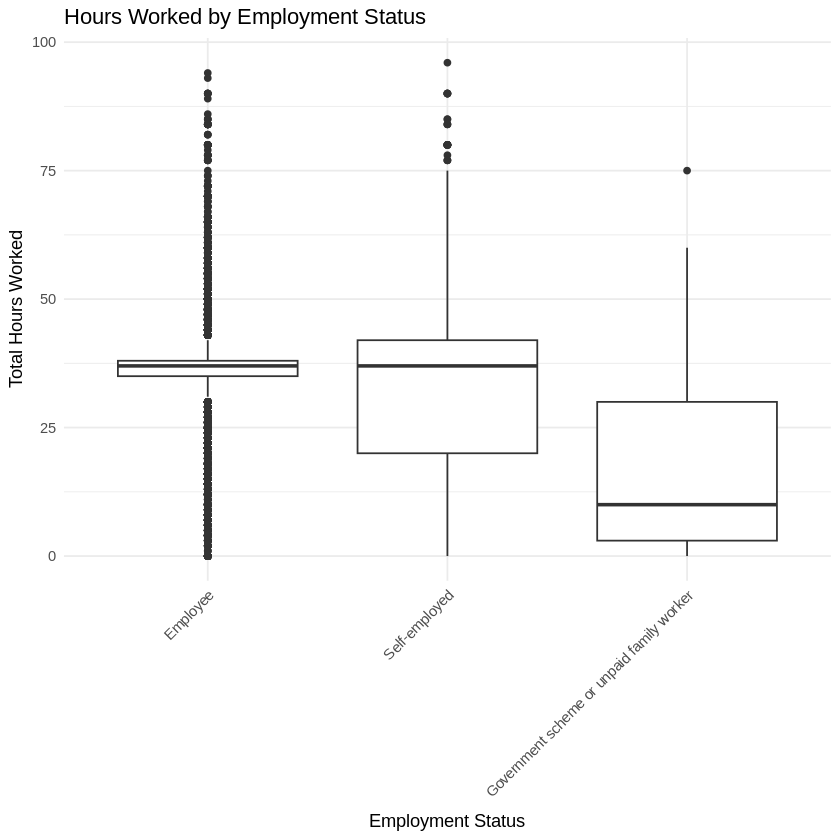

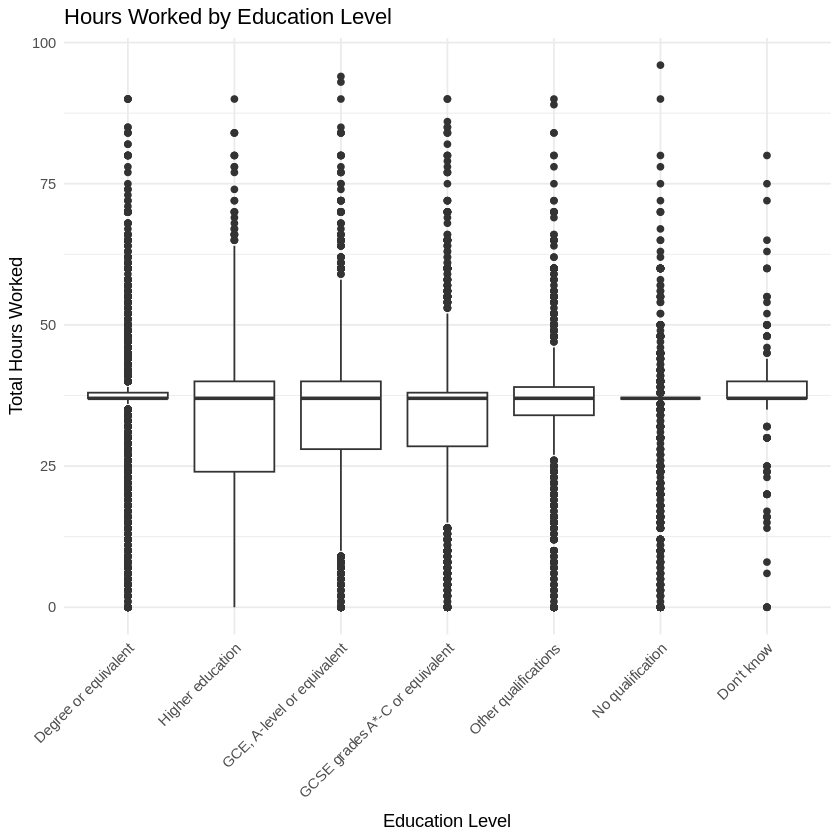

In [34]:
# Employment Status by Region
ggplot(qlfs_2015_imputed, aes(x = GOVTOF2, fill = STAT3R)) +
  geom_bar(position = "fill") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(title = "Employment Status Distribution by Region",
       x = "Region",
       y = "Proportion")

# Hours Worked by Employment Status
ggplot(qlfs_2015_imputed, aes(x = STAT3R, y = TOTHRS)) +
  geom_boxplot() +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(title = "Hours Worked by Employment Status",
       x = "Employment Status",
       y = "Total Hours Worked")

# Hours Worked by Education Level
ggplot(qlfs_2015_imputed, aes(x = HIQUL15D, y = TOTHRS)) +
  geom_boxplot() +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(title = "Hours Worked by Education Level",
       x = "Education Level",
       y = "Total Hours Worked")

In [35]:
# Chi-square tests for key relationships
key_relationships <- list(
  "Employment Status vs Region" = chisq.test(table(qlfs_2015_imputed$STAT3R, qlfs_2015_imputed$GOVTOF2)),
  "Employment Status vs Education" = chisq.test(table(qlfs_2015_imputed$STAT3R, qlfs_2015_imputed$HIQUL15D)),
  "Employment Status vs Socio-economic Class" = chisq.test(table(qlfs_2015_imputed$STAT3R, qlfs_2015_imputed$NSECMJ3R))
)

# Display chi-square test results
for (name in names(key_relationships)) {
  cat("\n", name, "\n")
  print(key_relationships[[name]])
  cat("\n")
}

Warning message in chisq.test(table(qlfs_2015_imputed$STAT3R, qlfs_2015_imputed$GOVTOF2)):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(table(qlfs_2015_imputed$STAT3R, qlfs_2015_imputed$HIQUL15D)):
“Chi-squared approximation may be incorrect”



 Employment Status vs Region 

	Pearson's Chi-squared test

data:  table(qlfs_2015_imputed$STAT3R, qlfs_2015_imputed$GOVTOF2)
X-squared = NaN, df = 24, p-value = NA



 Employment Status vs Education 

	Pearson's Chi-squared test

data:  table(qlfs_2015_imputed$STAT3R, qlfs_2015_imputed$HIQUL15D)
X-squared = 48.709, df = 12, p-value = 2.352e-06



 Employment Status vs Socio-economic Class 

	Pearson's Chi-squared test

data:  table(qlfs_2015_imputed$STAT3R, qlfs_2015_imputed$NSECMJ3R)
X-squared = 5671.4, df = 6, p-value < 2.2e-16




In [36]:
# ANOVA for hours worked by various categories
anova_tests <- list(
  "Hours by Employment Status" = aov(TOTHRS ~ STAT3R, data = qlfs_2015_imputed),
  "Hours by Education" = aov(TOTHRS ~ HIQUL15D, data = qlfs_2015_imputed),
  "Hours by Region" = aov(TOTHRS ~ GOVTOF2, data = qlfs_2015_imputed)
)

# Display ANOVA test results
for (name in names(anova_tests)) {
  cat("\n", name, "\n")
  print(summary(anova_tests[[name]]))
  cat("\n")
}


 Hours by Employment Status 
               Df  Sum Sq Mean Sq F value Pr(>F)    
STAT3R          2   30375   15188   80.79 <2e-16 ***
Residuals   22425 4215440     188                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


 Hours by Education 
               Df  Sum Sq Mean Sq F value Pr(>F)    
HIQUL15D        6   19867    3311   17.57 <2e-16 ***
Residuals   22421 4225948     188                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


 Hours by Region 
               Df  Sum Sq Mean Sq F value   Pr(>F)    
GOVTOF2        11    5936   539.7   2.853 0.000962 ***
Residuals   22416 4239879   189.1                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



In [37]:
# Tukey's HSD Tests
for (name in names(anova_tests)) {
  cat("\n", name, "\n")
  print(TukeyHSD(anova_tests[[name]]))
  cat("\n")
}


 Hours by Employment Status 
  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = TOTHRS ~ STAT3R, data = qlfs_2015_imputed)

$STAT3R
                                                              diff        lwr
Self-employed-Employee                                   -1.798256  -2.494481
Government scheme or unpaid family worker-Employee      -17.250621 -20.828476
Government scheme or unpaid family worker-Self-employed -15.452364 -19.083110
                                                               upr p adj
Self-employed-Employee                                   -1.102032     0
Government scheme or unpaid family worker-Employee      -13.672765     0
Government scheme or unpaid family worker-Self-employed -11.821619     0



 Hours by Education 
  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = TOTHRS ~ HIQUL15D, data = qlfs_2015_imputed)

$HIQUL15D
                                            

In [38]:
# Create binary employment status (employed vs not employed)
qlfs_2015_imputed$employed_binary <- ifelse(qlfs_2015_imputed$STAT3R == "Employee", 1, 0)

# Fit multinomial logistic regression
multinom_model <- multinom(STAT3R ~ HIQUL15D + ILODEFR + NSECMJ3R + GOVTOF2 +
                          SEX + AGEEULR + MARSTA3R + FTPTWK + ETHUK7R,
                          data = qlfs_2015_imputed)

# Display model results
cat("Multinomial Logistic Regression Results\n")
cat("=====================================\n\n")
print(summary(multinom_model))

# weights:  141 (92 variable)
initial  value 24639.676410 
iter  10 value 5395.720973
iter  20 value 5004.082540
iter  30 value 4929.306670
iter  40 value 4891.464499
iter  50 value 4866.279402
iter  60 value 4817.871067
iter  70 value 4790.696704
iter  80 value 4789.410718
iter  90 value 4789.248116
iter 100 value 4788.966873
final  value 4788.966873 
stopped after 100 iterations
Multinomial Logistic Regression Results



Warning message in sqrt(diag(vc)):
“NaNs produced”


Call:
multinom(formula = STAT3R ~ HIQUL15D + ILODEFR + NSECMJ3R + GOVTOF2 + 
    SEX + AGEEULR + MARSTA3R + FTPTWK + ETHUK7R, data = qlfs_2015_imputed)

Coefficients:
                                          (Intercept) HIQUL15DHigher education
Self-employed                               -3.801193              -0.01083387
Government scheme or unpaid family worker   -9.213309              -0.15356717
                                          HIQUL15DGCE, A-level or equivalent
Self-employed                                                     -0.1824827
Government scheme or unpaid family worker                         -0.9483609
                                          HIQUL15DGCSE grades A*-C or equivalent
Self-employed                                                         -0.3651027
Government scheme or unpaid family worker                             -0.3462338
                                          HIQUL15DOther qualifications
Self-employed                                      

In [39]:
# Binary logistic regression
binary_model <- glm(employed_binary ~ HIQUL15D + ILODEFR + NSECMJ3R + GOVTOF2 +
                    SEX + AGEEULR + MARSTA3R + FTPTWK + ETHUK7R,
                    family = binomial(link = "logit"),
                    data = qlfs_2015_imputed)

# Display binary model results
cat("Binary Logistic Regression Results\n")
cat("================================\n\n")
print(summary(binary_model))

Binary Logistic Regression Results


Call:
glm(formula = employed_binary ~ HIQUL15D + ILODEFR + NSECMJ3R + 
    GOVTOF2 + SEX + AGEEULR + MARSTA3R + FTPTWK + ETHUK7R, family = binomial(link = "logit"), 
    data = qlfs_2015_imputed)

Coefficients:
                                                         Estimate Std. Error
(Intercept)                                               3.24155    0.31571
HIQUL15DHigher education                                 -0.01158    0.09226
HIQUL15DGCE, A-level or equivalent                        0.19902    0.07714
HIQUL15DGCSE grades A*-C or equivalent                    0.36023    0.08402
HIQUL15DOther qualifications                             -0.21492    0.11751
HIQUL15DNo qualification                                 -0.55463    0.12138
HIQUL15DDon't know                                        0.49294    0.30864
ILODEFRILO unemployed                                     0.08135    0.19657
ILODEFRInactive                                           1

In [40]:
# Regional Analysis Models (first 3 regions for brevity)
regions <- unique(qlfs_2015_imputed$GOVTOF2)[1:3]
regional_models <- lapply(regions, function(region) {
  region_data <- subset(qlfs_2015_imputed, GOVTOF2 == region)
  glm(employed_binary ~ HIQUL15D + ILODEFR + NSECMJ3R +
      SEX + AGEEULR + MARSTA3R + FTPTWK + ETHUK7R,
      family = binomial(link = "logit"),
      data = region_data)
})

# Display regional model results
for (i in seq_along(regional_models)) {
  cat("\nRegion:", regions[i], "\n")
  print(summary(regional_models[[i]]))
  cat("\n")
}

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Region: 9 

Call:
glm(formula = employed_binary ~ HIQUL15D + ILODEFR + NSECMJ3R + 
    SEX + AGEEULR + MARSTA3R + FTPTWK + ETHUK7R, family = binomial(link = "logit"), 
    data = region_data)

Coefficients:
                                                          Estimate Std. Error
(Intercept)                                               2.876150   0.607009
HIQUL15DHigher education                                 -0.006861   0.225593
HIQUL15DGCE, A-level or equivalent                        0.322532   0.193275
HIQUL15DGCSE grades A*-C or equivalent                    0.216765   0.203331
HIQUL15DOther qualifications                             -0.169507   0.314593
HIQUL15DNo qualification                                 -0.683442   0.324980
HIQUL15DDon't know                                       -0.942932   1.114431
ILODEFRILO unemployed                                     0.603535   0.604851
ILODEFRInactive                                           1.139650   0.228836
NSECMJ3RInte

In [41]:
# Multicollinearity Check
vif_results <- vif(binary_model)
print("Variance Inflation Factors (VIF):")
print(vif_results)

[1] "Variance Inflation Factors (VIF):"
             GVIF Df GVIF^(1/(2*Df))
HIQUL15D 1.514554  6        1.035199
ILODEFR  1.929850  2        1.178639
NSECMJ3R 1.888673  3        1.111799
GOVTOF2  1.209759 11        1.008693
SEX      1.373745  1        1.172069
AGEEULR  3.418563 11        1.057464
MARSTA3R 1.575616  2        1.120373
FTPTWK   1.309898  1        1.144508
ETHUK7R  1.203405  6        1.015549


In [42]:
# Heteroskedasticity Test
hetero_test <- bptest(binary_model)
cat("Heteroskedasticity Test\n")
cat("=====================\n\n")
print(hetero_test)

Heteroskedasticity Test


	studentized Breusch-Pagan test

data:  binary_model
BP = 5658.4, df = 43, p-value < 2.2e-16



In [43]:
# Robust Standard Errors
robust_se <- sqrt(diag(vcovHC(binary_model, type = "HC1")))
coef_table <- cbind(
  Estimate = coef(binary_model),
  "Std. Error" = robust_se,
  "z value" = coef(binary_model) / robust_se,
  "Pr(>|z|)" = 2 * pnorm(abs(coef(binary_model) / robust_se), lower.tail = FALSE)
)
print("Coefficients with Robust Standard Errors:")
print(coef_table)

[1] "Coefficients with Robust Standard Errors:"
                                                            Estimate Std. Error
(Intercept)                                               3.24154900 0.32285712
HIQUL15DHigher education                                 -0.01157751 0.09455844
HIQUL15DGCE, A-level or equivalent                        0.19901506 0.07632969
HIQUL15DGCSE grades A*-C or equivalent                    0.36022869 0.08523488
HIQUL15DOther qualifications                             -0.21491906 0.11296256
HIQUL15DNo qualification                                 -0.55462860 0.11552292
HIQUL15DDon't know                                        0.49293851 0.28643568
ILODEFRILO unemployed                                     0.08134564 0.22359175
ILODEFRInactive                                           1.14558970 0.11055144
NSECMJ3RIntermediate occupations and small employers     -2.27582836 0.06437699
NSECMJ3RRoutine and manual occupations                    4.25985201 0.3

[1] "Odds Ratios (Feature Importance):"
                                                                                                         Variable
(Intercept)                                                                                           (Intercept)
HIQUL15DHigher education                                                                 HIQUL15DHigher education
HIQUL15DGCE, A-level or equivalent                                             HIQUL15DGCE, A-level or equivalent
HIQUL15DGCSE grades A*-C or equivalent                                     HIQUL15DGCSE grades A*-C or equivalent
HIQUL15DOther qualifications                                                         HIQUL15DOther qualifications
HIQUL15DNo qualification                                                                 HIQUL15DNo qualification
HIQUL15DDon't know                                                                             HIQUL15DDon't know
ILODEFRILO unemployed                           

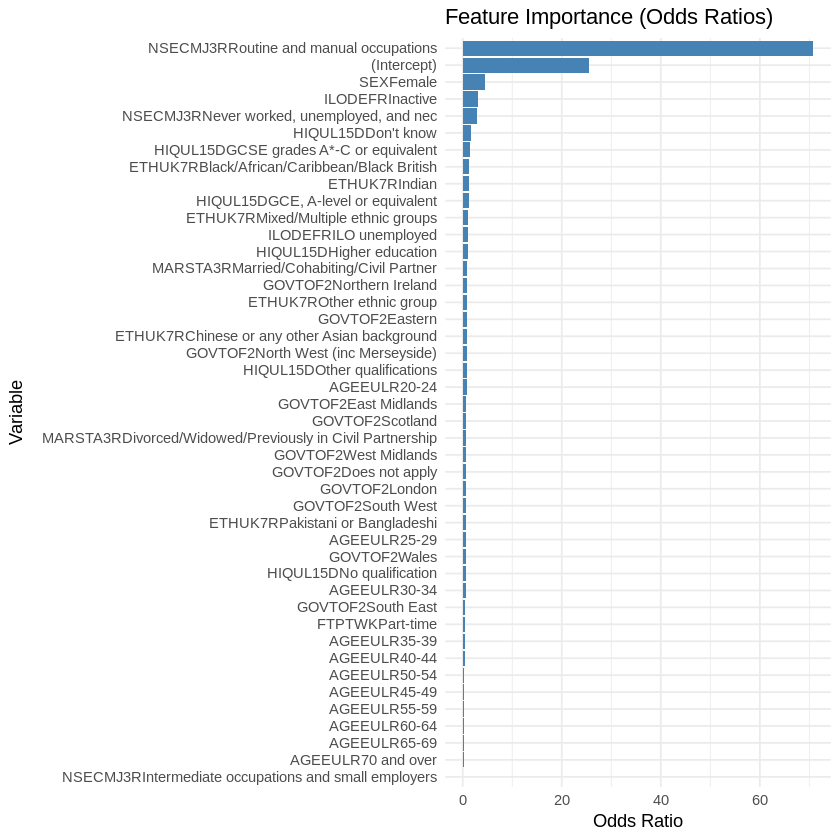

In [44]:
# Calculate feature importance using odds ratios
odds_ratios <- exp(coef(binary_model))
odds_ratios_df <- data.frame(
  Variable = names(odds_ratios),
  Odds_Ratio = odds_ratios
)
print("Odds Ratios (Feature Importance):")
print(odds_ratios_df)

# Create feature importance plot
ggplot(odds_ratios_df, aes(x = reorder(Variable, Odds_Ratio), y = Odds_Ratio)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  coord_flip() +
  theme_minimal() +
  labs(title = "Feature Importance (Odds Ratios)",
       x = "Variable",
       y = "Odds Ratio")

In [45]:
# Calculate AIC and BIC for model comparison
model_comparison <- data.frame(
  Model = c("Binary Logistic", "Multinomial Logistic"),
  AIC = c(AIC(binary_model), AIC(multinom_model)),
  BIC = c(BIC(binary_model), BIC(multinom_model))
)
print("Model Comparison:")
print(model_comparison)

[1] "Model Comparison:"
                 Model      AIC      BIC
1      Binary Logistic 9759.060 10111.85
2 Multinomial Logistic 9753.934 10459.52


[1] "Employment Rates by Qualification:"
# A tibble: 7 × 4
  HIQUL15D                       total employed employment_rate
  <fct>                          <int>    <dbl>           <dbl>
1 Degree or equivalent            7647     6836            89.4
2 Higher education                1937     1660            85.7
3 GCE, A-level or equivalent      4539     3987            87.8
4 GCSE grades A*-C or equivalent  4195     3793            90.4
5 Other qualifications            1820     1620            89.0
6 No qualification                2096     1889            90.1
7 Don't know                       194      177            91.2


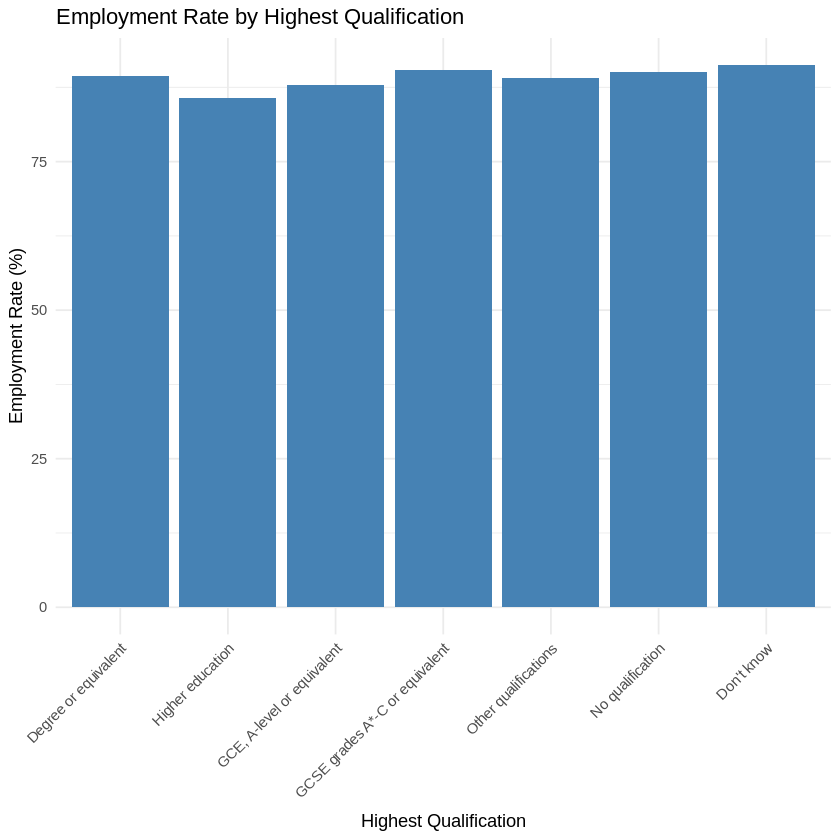

In [46]:
# Calculate employment rates
employment_rates <- qlfs_2015_imputed %>%
  group_by(HIQUL15D) %>%
  summarise(
    total = n(),
    employed = sum(employed_binary),
    employment_rate = (employed / total) * 100
  )

# Display employment rates
print("Employment Rates by Qualification:")
print(employment_rates)

# Create employment rate plot
ggplot(employment_rates, aes(x = HIQUL15D, y = employment_rate)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(title = "Employment Rate by Highest Qualification",
       x = "Highest Qualification",
       y = "Employment Rate (%)")